<a href="https://colab.research.google.com/github/Mix1996/Project-2-Classification/blob/main/Project_2_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [58]:
## Pandas
import pandas as pd
## Numpy
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math

#**Load the Data Dataset 1**

In [59]:
## Load in Data
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTcEGRHb41Faze2NRGsr7_flDwSaTRzfYVkzpuFmBDmW6JYaMD7HKt7ahPJAhaPpxuH89scIHSuTm_O/pub?output=csv'
df = pd.read_csv(path)

### **Inspect the Data**

In [60]:
## Display the first (5) rows
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [61]:
## Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 observations, and the columns represent 14 features and 1 target variable.


In [62]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [63]:
## Display the descriptive statistics for the numeric columns
df.describe(include="number") # or 'object'

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## **First choice: dataset 1**

**1.Source of data**
   This dataset named “adult” is found in the UCI machine learning repository
   http://www.cs.toronto.edu/~delve/data/adult/desc.html
   
   The detailed description on the dataset can be found in the original UCI documentation
   http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

**2. Brief description of data**

This dataset appears to be related to income classification or prediction, where the goal might be to predict an individual's income category (e.g., ">50K" or "<=50K") based on various features such as age, education, occupation, etc.

Total Columns: 15
Total Rows: 48842

**3. What is the target?**

The target is the income. We can try predict the income range of an individual based on the feaures.

**4. What does one row represent? (A person? A business? An event? A product?)**

One row in this dataset represents information about a person. Each row provides demographic and employment-related attributes for an individual. Therefore, the dataset is focused on describing and profiling people, not businesses, events, or products.

**5. Is this a classification or regression problem?**

If the primary objective is to predict or classify whether an individual's income falls into one of two categories, such as ">50K" or "<=50K," then it is a classification problem.

**6. How many features does the data have?**
14 features (income is excluded as this is the target)

**7. How many rows are in the dataset?**

Total Rows: 48842

**8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

**Categorical Data Handling**: Many columns in the dataset are categorical, such as "workclass," "education," "marital-status," "occupation," "relationship," "race," "gender," and "native-country." Handling categorical data often requires encoding techniques like one-hot encoding or label encoding.

**Missing Data:** Although the dataset is described as having no missing values, in real-world scenarios, missing data is common. It's essential to handle missing data if it exists, either by imputation or by removing rows or columns with missing values.

**Model Fairness:** Ensuring that the model does not exhibit bias or unfairness, especially when making decisions about individuals' income.

**Feature Importance:** Determining which features are the most important for predicting income, as this can provide valuable insights.


# **Load the Data Dataset 2**

In [64]:
## Load in Data
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSn83v5-8JzCpC7oPmBrXwzkP7zkqSEojOOS8Bf5Z_sDC-z68i9cjPbLRRXBdEi45BDarFIMEj9qLDB/pub?output=csv'
df2 = pd.read_csv(path)

### **Inspect the Data**

In [65]:
## Display the first (5) rows
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [66]:
## Display the number of rows and columns for the dataframe
df2.shape
print(f'There are {df2.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df2.shape[0]} observations, and the columns represent {df2.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 15 columns.
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


In [67]:
## Display the column names, count of non-null values, and their datatypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [68]:
## Display the descriptive statistics for the numeric columns
df2.describe(include="number") # or 'object'

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## **Second choice: dataset 2**

**1.Source of data**
   This dataset named “Stroke Prediction Dataset” is found Kaggle learning repository
   https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
  

**2. Brief description of data**

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Total Columns: 15
Total Rows: 5110

**3. What is the target?**

The target is the stroke to predict if the patient is going to have a stroke.

**4. What does one row represent? (A person? A business? An event? A product?)**

One row in this dataset represents information about an individual person. Each row provides various attributes and characteristics of an individual, such as their age, gender, health conditions (hypertension and heart disease), marital status, occupation, residence type, health metrics (average glucose level and BMI), smoking status, and whether or not they had a stroke.

**5. Is this a classification or regression problem?**

In classification tasks, the objective is to categorize data points (in this case, individuals) into one of the predefined classes or categories, which aligns with the binary classification of stroke risk in this dataset.

**6. How many features does the data have?**
11 features and one target variable

**7. How many rows are in the dataset?**

Total Rows: 5110

**8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

**Handling Missing Data:** The 'bmi' column contains missing values (null values). Dealing with missing data can be challenging, and you'll need to decide on an appropriate strategy, such as imputation or removal of rows with missing values.

**Imbalanced Target Variable: **Imbalanced datasets, where one class (e.g., individuals who had a stroke) is significantly less frequent than the other, can lead to model bias.

**Model Selection and Evaluation:** Choosing an appropriate machine learning algorithm and evaluation metrics can be challenging.

**Interpreting Results:** Understanding the factors that contribute to stroke risk and interpreting the model's predictions can be complex. This is especially important in healthcare applications, where interpretability and transparency are critical.


#Project 2 - Part 2 (Core)

Dataset 2 was chosen

##Cleaning the Data

### **Remove Unecessary Rows & Columns**

In [69]:
# remove unnecessary columns
df2.drop(columns=['id'], inplace=True)
df2.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [70]:
# Display the number of duplicate rows in the dataset
print(f'There are {df2.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [71]:
# Drop duplicte rows
df2.drop_duplicates(inplace=True)

### **Missing Values**

In [72]:
# Display the total number of missing values
print(f'There are {df2.isna().sum().sum()} missing values.')

There are 201 missing values.


In [73]:
# Check for missing values. You should produce an output that shows the number of missing values for each feature.
df2.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [74]:
mean_bmi = df2['bmi'].mean()
median_bmi = df2['bmi'].median()
df2['bmi'].fillna(mean_bmi, inplace=True)

In [75]:
# Check for missing values. You should produce an output that shows the number of missing values for each feature.
df2.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Visualisations

Text(0.5, 1.0, '# of strokes')

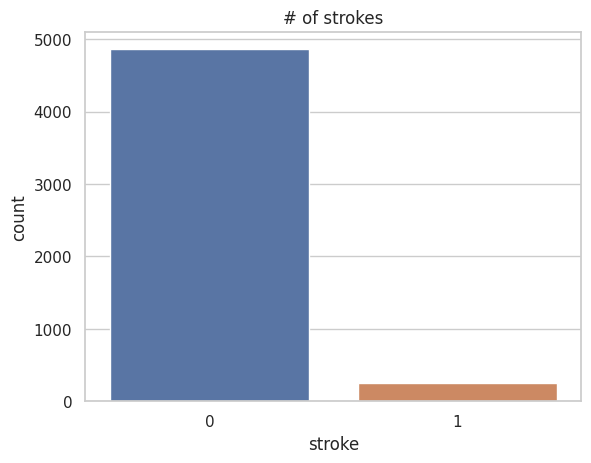

In [76]:
# Check univariate distributions and explore categorical variable(s)

ax = sns.countplot(x=df2['stroke'])
ax.set_title('# of strokes')


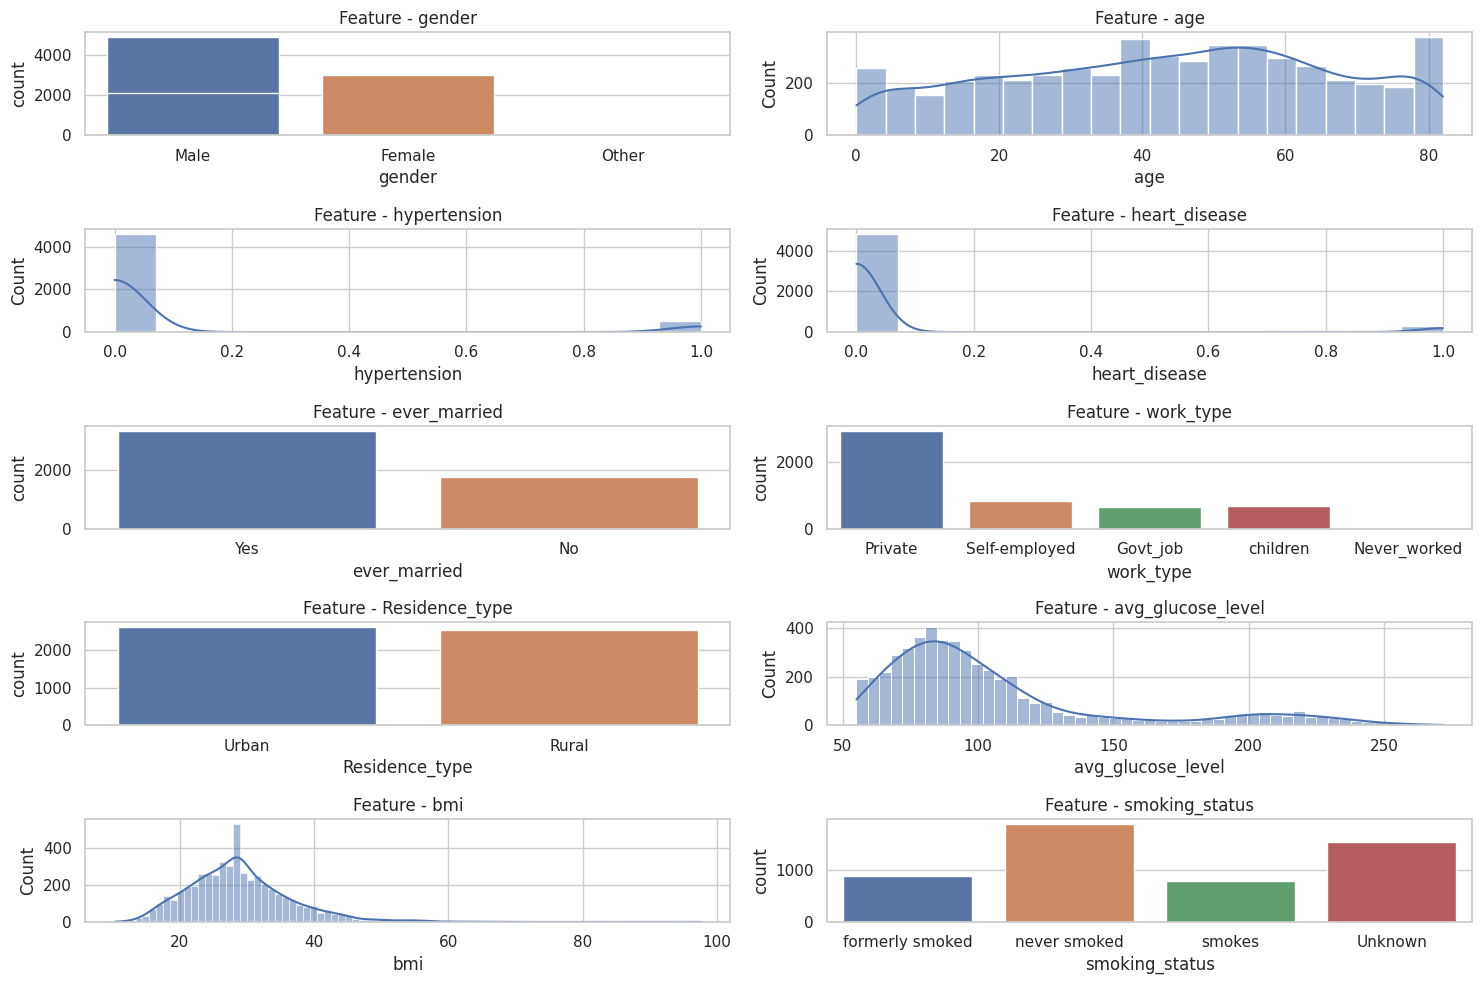

In [77]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Define a function to create univariate visualizations
def create_univariate_visualizations(df2, target_column):
    # Determine the number of features
    num_features = len(df2.columns) - 1  # Subtract 1 for the target variable

    # Calculate the number of rows and columns for subplots
    num_cols = 2  # Number of columns per row
    num_rows = math.ceil(num_features / num_cols)  # Calculate the number of rows needed

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.7)  # Increase hspace for more vertical spacing

    # Plot the target variable ("stroke")
    sns.countplot(data=df2, x=target_column, ax=axes[0, 0])
    axes[0, 0].set_title("Target Variable - Stroke")

    # Loop through the feature columns for visualization
    feature_columns = df2.drop(target_column, axis=1).columns
    for i, column in enumerate(feature_columns):
        row = i // num_cols
        col = i % num_cols

        # Check if the column is categorical
        if df2[column].dtype == "object":
            sns.countplot(data=df2, x=column, ax=axes[row, col])
            axes[row, col].set_title(f"Feature - {column}")
        else:
            sns.histplot(data=df2, x=column, ax=axes[row, col], kde=True)
            axes[row, col].set_title(f"Feature - {column}")

    # Remove empty subplots if necessary
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

# Call the function to create univariate visualizations
create_univariate_visualizations(df2, target_column="stroke")


<Axes: xlabel='bmi'>

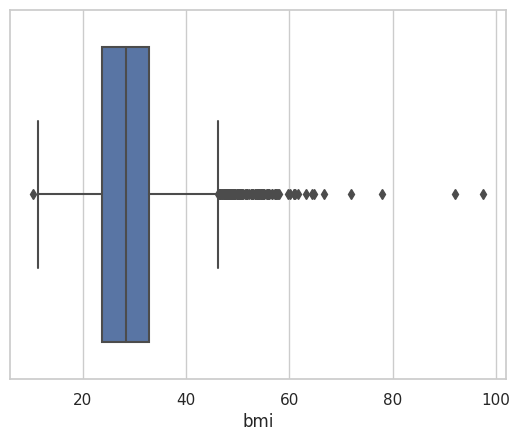

In [78]:
sns.boxplot(x=df2['bmi'])

Outliers Above the Upper Whisker: Ages over 50 are data points located above the upper whisker. They are considered potential high outliers.

#Project 2 Part 3 (Core)

##Creating Vizualisations of the data

<ipython-input-79-420195342825>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


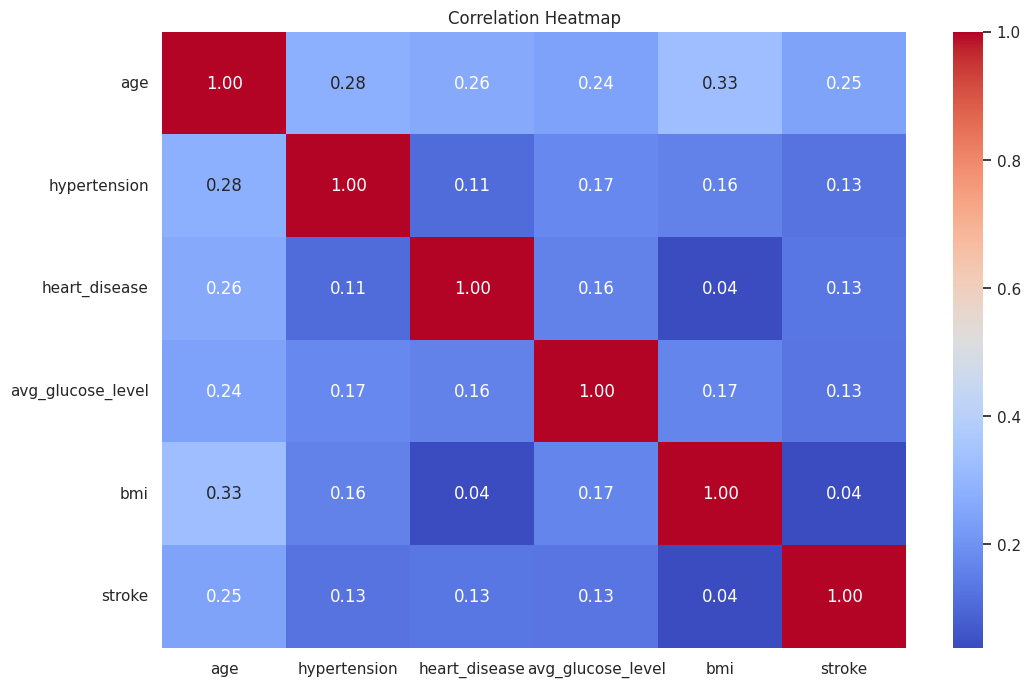

In [79]:

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


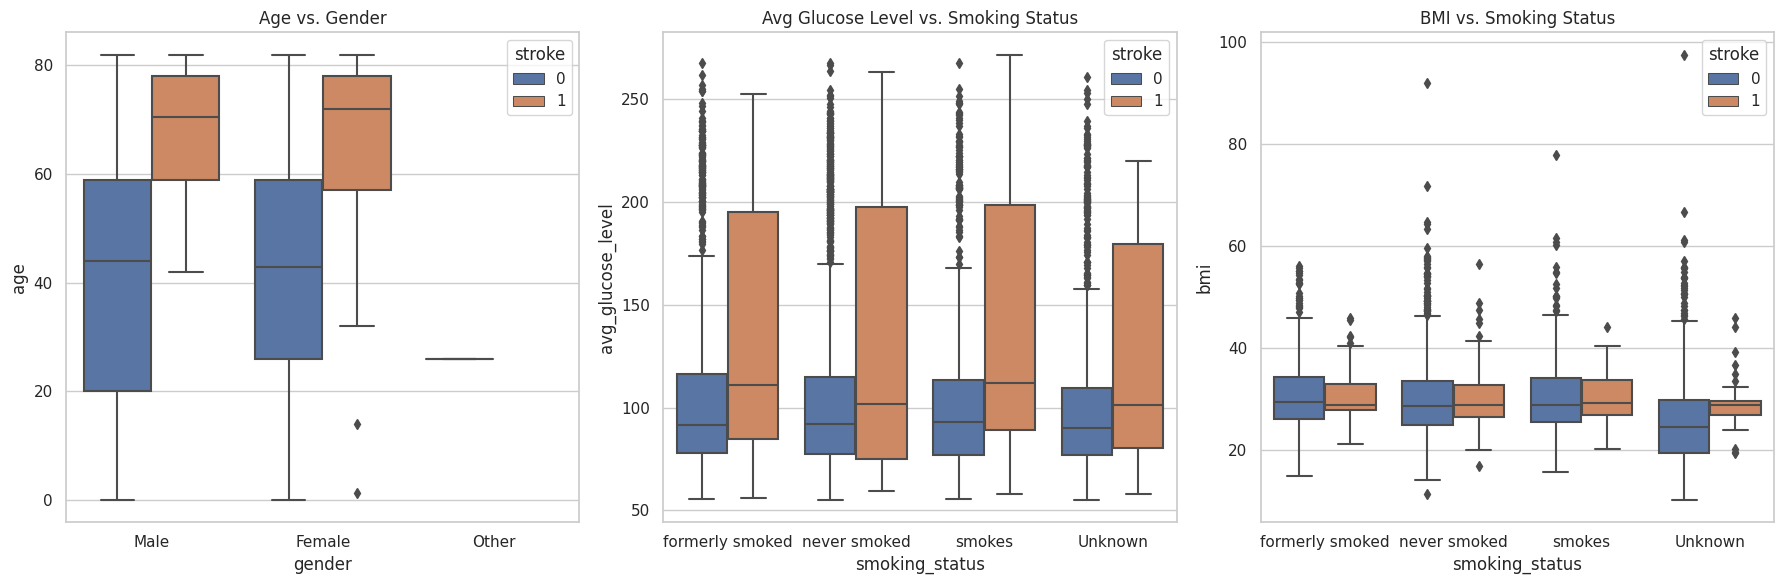

In [80]:
#This code creates a set of three boxplots that visually explore the relationships between different variables and their association with the "stroke" variable.
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='age', hue='stroke', data=df2)
plt.title("Age vs. Gender")

plt.subplot(1, 3, 2)
sns.boxplot(x='smoking_status', y='avg_glucose_level', hue='stroke', data=df2)
plt.title("Avg Glucose Level vs. Smoking Status")

plt.subplot(1, 3, 3)
sns.boxplot(x='smoking_status', y='bmi', hue='stroke', data=df2)
plt.title("BMI vs. Smoking Status")

plt.tight_layout()
plt.show()


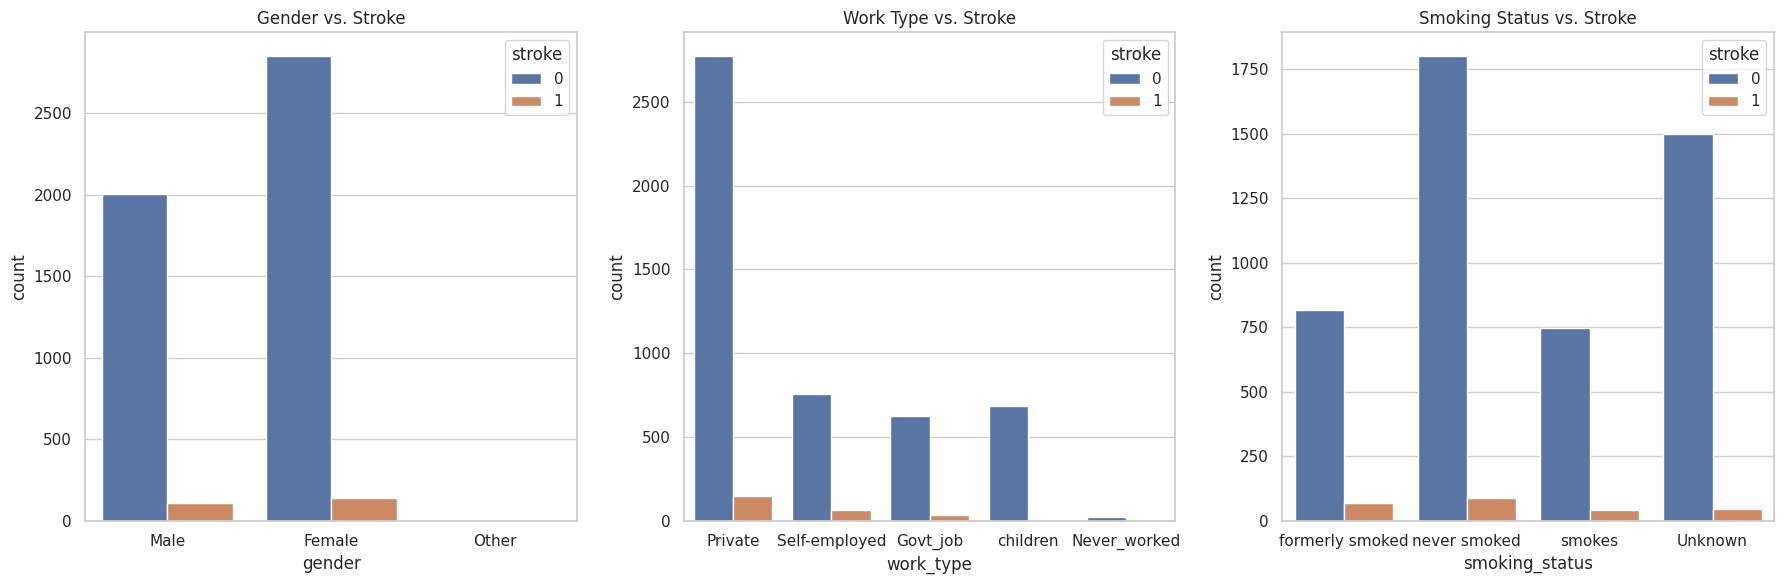

In [81]:
#This code creates a set of three countplots that visually explore the relationships between different categorical variables and their association with the "stroke" variable.
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='gender', hue='stroke', data=df2)
plt.title("Gender vs. Stroke")

plt.subplot(1, 3, 2)
sns.countplot(x='work_type', hue='stroke', data=df2)
plt.title("Work Type vs. Stroke")

plt.subplot(1, 3, 3)
sns.countplot(x='smoking_status', hue='stroke', data=df2)
plt.title("Smoking Status vs. Stroke")

plt.tight_layout()
plt.show()


##Visualization 1: Gender Distribution of Stroke Cases

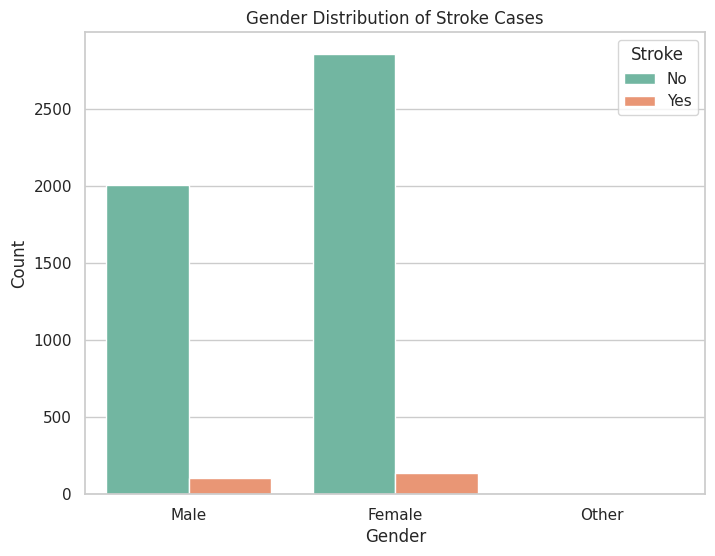

In [82]:
# Create a countplot for gender and stroke
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x='gender', hue='stroke', palette='Set2')
plt.title("Gender Distribution of Stroke Cases")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Stroke", labels=["No", "Yes"])
plt.show()


The first visualization provides a clear overview of the distribution of stroke cases by gender. It shows two bars for each gender category: one for individuals who haven't had a stroke (labeled "No") and another for those who have had a stroke (labeled "Yes"). This visualization allows stakeholders to see if there are gender-related trends in stroke occurrence. For instance, it can help identify whether there is a significant difference in the number of stroke cases between genders.
According to the data and visualisation, females are less likely to have a stroke compared to males.

##Visualization 2: Average Glucose Level vs. Age Scatter Plot

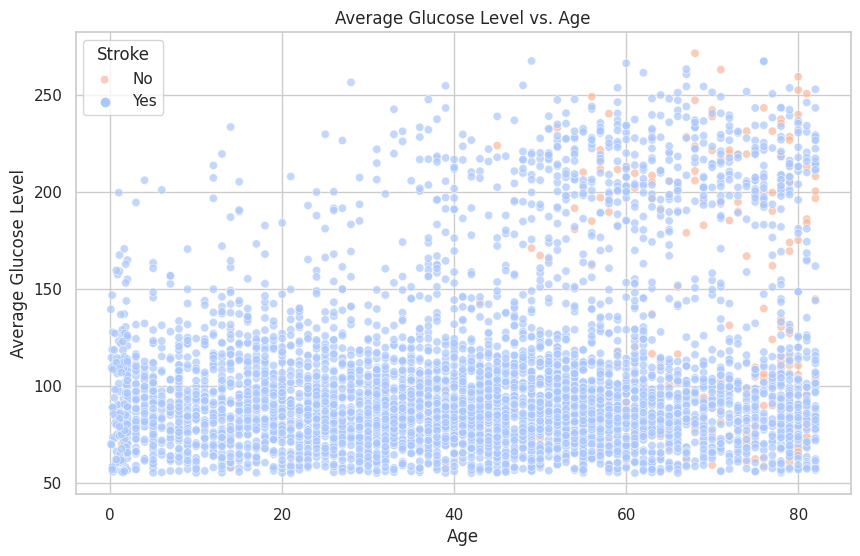

In [83]:
# Create a scatterplot for average glucose level and age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='age', y='avg_glucose_level', hue='stroke', palette='coolwarm', alpha=0.7)
plt.title("Average Glucose Level vs. Age")
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.legend(title="Stroke", labels=["No", "Yes"])
plt.show()


The second visualization is a scatter plot that depicts the relationship between age and average glucose level for individuals in the dataset. Each point represents a person, and the colour indicates whether they've had a stroke (blue for "No" and orange for "Yes"). This visualization helps stakeholders understand the distribution of glucose levels across different age groups and whether there is any noticeable trend.
According to the data and visualisation people between the age of 60-80 were more likely to have a stroke with an average glucose level above 150.